In [223]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [224]:
df_final = pd.read_csv('final_df.csv')
df_teams = pd.read_csv('team_avg_statistics.csv')



In [225]:
df_final.drop('Unnamed: 0',axis=1,inplace=True)

In [226]:
df_final

,home_team.id,home_team.name,home_team_Shots on Goal,home_team_Shots off Goal,home_team_Total Shots,home_team_Blocked Shots,home_team_Shots insidebox,home_team_Shots outsidebox,home_team_Fouls,home_team_Corner Kicks,home_team_Offsides,home_team_Ball Possession,home_team_Yellow Cards,home_team_Red Cards,home_team_Goalkeeper Saves,home_team_Total passes,home_team_Passes accurate,home_team_Passes %,away_team.id,away_team.name,away_team_Shots on Goal,away_team_Shots off Goal,away_team_Total Shots,away_team_Blocked Shots,away_team_Shots insidebox,away_team_Shots outsidebox,away_team_Fouls,away_team_Corner Kicks,away_team_Offsides,away_team_Ball Possession,away_team_Yellow Cards,away_team_Red Cards,away_team_Goalkeeper Saves,away_team_Total passes,away_team_Passes accurate,away_team_Passes %,home_team_goals,away_team_goals,home_team_result,away_team_result,home_team.Rank,home_team_Avg. age,home_team.Total value,home_team.Points,away_team.Rank,away_team. age,away_team.Total value,away_team.Points
0,2,France,4,4,9,1,6,3,21,0,0,39%,3,0,1,344,280,81%,26,Argentina,4,1,10,5,6,4,15,4,1,61%,5,0,0,512,444,87%,4,3,W,L,3,26.9,9.490000e+08,1786,4,26.2,5.817000e+08,1767
1,19,Nigeria,3,5,9,1,4,5,20,3,0,33%,2,0,2,283,186,66%,26,Argentina,4,2,8,2,7,1,15,5,2,67%,3,0,2,572,471,82%,1,2,L,W,32,26.3,2.687500e+08,1510,4,26.2,5.817000e+08,1767
2,2,France,5,8,19,6,12,7,6,4,1,36%,2,0,3,345,289,84%,1,Belgium,3,5,9,1,6,3,16,5,1,64%,3,0,4,594,542,91%,1,0,W,L,3,26.9,9.490000e+08,1786,1,26.1,3.810000e+08,1828
3,6,Brazil,9,7,27,11,16,11,14,8,1,58%,2,0,2,521,463,89%,1,Belgium,3,4,9,2,4,5,16,4,0,42%,2,0,9,374,301,80%,1,2,L,W,2,27.7,8.995000e+08,1823,1,26.1,3.810000e+08,1828
4,10,England,2,6,11,3,6,5,11,7,3,46%,0,0,2,467,410,88%,1,Belgium,4,3,14,7,9,5,14,2,1,54%,2,0,1,547,477,87%,0,1,L,W,5,25.2,1.260000e+09,1756,1,26.1,3.810000e+08,1828
5,2,France,6,0,7,1,2,5,13,2,1,34%,2,0,2,289,198,69%,3,Croatia,4,9,14,1,9,5,13,6,1,66%,1,0,3,528,440,83%,4,2,W,L,3,26.9,9.490000e+08,1786,15,27.7,3.145000e+08,1621
6,4,Russia,5,7,13,1,10,3,25,6,1,35%,1,0,1,400,259,65%,3,Croatia,3,11,18,4,12,6,18,8,0,65%,4,0,3,728,592,81%,2,2,L,W,35,26.9,1.213000e+08,1493,15,27.7,3.145000e+08,1621
7,26,Argentina,3,3,10,4,8,2,16,5,3,57%,3,0,2,499,397,80%,3,Croatia,5,6,14,3,7,7,22,2,3,43%,4,0,3,367,278,76%,0,3,L,W,4,26.2,5.817000e+08,1767,15,27.7,3.145000e+08,1621
8,18,Iceland,6,8,16,2,12,4,10,10,1,38%,3,0,0,314,226,72%,3,Croatia,2,8,14,4,4,10,11,5,2,62%,2,0,5,518,447,86%,1,2,L,W,60,24.7,7.350000e+06,1383,15,27.7,3.145000e+08,1621
9,2,France,5,5,12,2,7,6,16,5,0,55%,1,0,1,508,426,84%,20,Australia,1,3,6,2,4,2,19,1,0,45%,3,0,4,407,321,79%,2,1,W,L,3,26.9,9.490000e+08,1786,37,27.7,3.475000e+07,1487


In [227]:
df_teams.drop('Unnamed: 0',axis=1,inplace=True)
df_teams.head(5)

,Squad,Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK
0,Algeria,19.0,25.90,39.50,3.500000,38.500000,330.0,3.650000,3.500000,3.000000,3.000000,0.5,0.500000,5.500000,1.000000,0.810,0.690000,1.500000,0.690000,1.385000
1,Argentina,20.0,27.80,59.85,5.333333,58.666667,510.0,5.666667,7.333333,3.000000,7.333333,0.0,0.333333,4.000000,0.000000,1.390,0.623333,2.016667,1.390000,2.016667
2,Australia,17.0,28.00,47.70,3.000000,33.000000,270.0,3.000000,2.666667,0.666667,1.666667,1.0,1.000000,6.666667,0.666667,0.890,0.223333,1.113333,0.556667,0.776667
3,Belgium,20.5,26.65,52.75,6.000000,66.000000,555.0,6.150000,10.500000,8.000000,10.000000,0.5,0.500000,1.500000,0.000000,1.635,1.230000,2.865000,1.565000,2.790000
4,Bosnia and Herzegovina,20.0,26.50,53.70,3.000000,33.000000,270.0,3.000000,4.000000,2.000000,4.000000,0.0,0.000000,3.000000,0.000000,1.330,0.670000,2.000000,1.330000,2.000000


In [228]:
df_team_away = df_teams.add_prefix('away_')
df_team_away.rename(columns={'away_Squad':'away_team.name'},inplace=True)
df_team_away.head(1)

,away_team.name,away_Pl,away_Age,away_Poss,away_MP,away_Starts,away_Min,away_90s,away_Gls,away_Ast,away_G-PK,away_PK,away_PKatt,away_CrdY,away_CrdR,away_Gls.1,away_Ast.1,away_G+A,away_G-PK.1,away_G+A-PK
0,Algeria,19.0,25.9,39.5,3.5,38.5,330.0,3.65,3.5,3.0,3.0,0.5,0.5,5.5,1.0,0.81,0.69,1.5,0.69,1.385


In [229]:
df_team_home = df_teams.add_prefix('home_')
df_team_home.rename(columns={'home_Squad':'home_team.name'},inplace=True)
df_team_home.head(1)

,home_team.name,home_Pl,home_Age,home_Poss,home_MP,home_Starts,home_Min,home_90s,home_Gls,home_Ast,home_G-PK,home_PK,home_PKatt,home_CrdY,home_CrdR,home_Gls.1,home_Ast.1,home_G+A,home_G-PK.1,home_G+A-PK
0,Algeria,19.0,25.9,39.5,3.5,38.5,330.0,3.65,3.5,3.0,3.0,0.5,0.5,5.5,1.0,0.81,0.69,1.5,0.69,1.385


In [230]:

df_all = pd.merge(df_final,df_team_home, on='home_team.name')
df_all = pd.merge(df_all , df_team_away , on='away_team.name')
df_all

,home_team.id,home_team.name,home_team_Shots on Goal,home_team_Shots off Goal,home_team_Total Shots,home_team_Blocked Shots,home_team_Shots insidebox,home_team_Shots outsidebox,home_team_Fouls,home_team_Corner Kicks,home_team_Offsides,home_team_Ball Possession,home_team_Yellow Cards,home_team_Red Cards,home_team_Goalkeeper Saves,home_team_Total passes,home_team_Passes accurate,home_team_Passes %,away_team.id,away_team.name,away_team_Shots on Goal,away_team_Shots off Goal,away_team_Total Shots,away_team_Blocked Shots,away_team_Shots insidebox,away_team_Shots outsidebox,away_team_Fouls,away_team_Corner Kicks,away_team_Offsides,away_team_Ball Possession,away_team_Yellow Cards,away_team_Red Cards,away_team_Goalkeeper Saves,away_team_Total passes,away_team_Passes accurate,away_team_Passes %,home_team_goals,away_team_goals,home_team_result,away_team_result,home_team.Rank,home_team_Avg. age,home_team.Total value,home_team.Points,away_team.Rank,away_team. age,away_team.Total value,away_team.Points,home_Pl,home_Age,home_Poss,home_MP,home_Starts,home_Min,home_90s,home_Gls,home_Ast,home_G-PK,home_PK,home_PKatt,home_CrdY,home_CrdR,home_Gls.1,home_Ast.1,home_G+A,home_G-PK.1,home_G+A-PK,away_Pl,away_Age,away_Poss,away_MP,away_Starts,away_Min,away_90s,away_Gls,away_Ast,away_G-PK,away_PK,away_PKatt,away_CrdY,away_CrdR,away_Gls.1,away_Ast.1,away_G+A,away_G-PK.1,away_G+A-PK
0,2,France,4,4,9,1,6,3,21,0,0,39%,3,0,1,344,280,81%,26,Argentina,4,1,10,5,6,4,15,4,1,61%,5,0,0,512,444,87%,4,3,W,L,3,26.9,9.490000e+08,1786,4,26.2,5.817000e+08,1767,19.666667,26.400000,50.80,5.000000,55.000000,450.0,5.000000,7.000000,4.000000,5.666667,1.333333,1.666667,3.000000,0.333333,1.213333,0.686667,1.900000,1.006667,1.690000,20.000000,27.800000,59.85,5.333333,58.666667,510.0,5.666667,7.333333,3.000000,7.333333,0.000000,0.333333,4.000000,0.000000,1.390000,0.623333,2.016667,1.390000,2.016667
1,19,Nigeria,3,5,9,1,4,5,20,3,0,33%,2,0,2,283,186,66%,26,Argentina,4,2,8,2,7,1,15,5,2,67%,3,0,2,572,471,82%,1,2,L,W,32,26.3,2.687500e+08,1510,4,26.2,5.817000e+08,1767,17.666667,25.666667,49.05,3.333333,36.666667,300.0,3.333333,3.000000,1.666667,2.333333,0.666667,0.666667,4.000000,0.000000,0.916667,0.473333,1.390000,0.696667,1.166667,20.000000,27.800000,59.85,5.333333,58.666667,510.0,5.666667,7.333333,3.000000,7.333333,0.000000,0.333333,4.000000,0.000000,1.390000,0.623333,2.016667,1.390000,2.016667
2,2,France,5,8,19,6,12,7,6,4,1,36%,2,0,3,345,289,84%,1,Belgium,3,5,9,1,6,3,16,5,1,64%,3,0,4,594,542,91%,1,0,W,L,3,26.9,9.490000e+08,1786,1,26.1,3.810000e+08,1828,19.666667,26.400000,50.80,5.000000,55.000000,450.0,5.000000,7.000000,4.000000,5.666667,1.333333,1.666667,3.000000,0.333333,1.213333,0.686667,1.900000,1.006667,1.690000,20.500000,26.650000,52.75,6.000000,66.000000,555.0,6.150000,10.500000,8.000000,10.000000,0.500000,0.500000,1.500000,0.000000,1.635000,1.230000,2.865000,1.565000,2.790000
3,6,Brazil,9,7,27,11,16,11,14,8,1,58%,2,0,2,521,463,89%,1,Belgium,3,4,9,2,4,5,16,4,0,42%,2,0,9,374,301,80%,1,2,L,W,2,27.7,8.995000e+08,1823,1,26.1,3.810000e+08,1828,19.333333,28.233333,56.00,5.666667,62.333333,520.0,5.766667,9.333333,5.333333,9.000000,0.333333,0.333333,3.000000,0.333333,1.633333,0.876667,2.510000,1.586667,2.463333,20.500000,26.650000,52.75,6.000000,66.000000,555.0,6.150000,10.500000,8.000000,10.000000,0.500000,0.500000,1.500000,0.000000,1.635000,1.230000,2.865000,1.565000,2.790000
4,10,England,2,6,11,3,6,5,11,7,3,46%,0,0,2,467,410,88%,1,Belgium,4,3,14,7,9,5,14,2,1,54%,2,0,1,547,477,87%,0,1,L,W,5,25.2,1.260000e+09,1756,1,26.1,3.810000e+08,1828,20.333333,27.033333,54.35,4.666667,51.333333,440.0,4.900000,5.666667,2.666667,4.666667,1.000000,1.000000,3.333333,0.000000,0.996667,0.483333,1.476667,0.863333,1.346667,20.500000,26.650000,52.75,6.000000,66.000000,555.0,6.150000,10.500000,8.000000,10.000000,0.500000,0.500000,1.500000,0.000000,1.635000,1.230000,2.865000,1.565000,2.790000
5,2,France,6,0,7,1,2,5,13,2,1,34%,2,0,2,289,198,69%,3,Croatia,4,9,14,1,9,5,13,6,1,66%,1,0,3,528,440,83%,4,2,W,L

In [231]:
sorter = ['home_team.id', 'home_team.name', 'home_team_Shots on Goal',
       'home_team_Shots off Goal', 'home_team_Total Shots',
       'home_team_Blocked Shots', 'home_team_Shots insidebox',
       'home_team_Shots outsidebox', 'home_team_Fouls',
       'home_team_Corner Kicks', 'home_team_Offsides',
       'home_team_Ball Possession', 'home_team_Yellow Cards',
       'home_team_Red Cards', 'home_team_Goalkeeper Saves',
       'home_team_Total passes', 'home_team_Passes accurate',
       'home_team_Passes %','home_team.Rank', 'home_team_Avg. age',
       'home_team.Total value', 'home_team.Points','home_Pl', 'home_Age', 'home_Poss', 'home_MP', 'home_Starts',
       'home_Min', 'home_90s', 'home_Gls', 'home_Ast', 'home_G-PK', 'home_PK',
       'home_PKatt', 'home_CrdY', 'home_CrdR', 'home_Gls.1', 'home_Ast.1',
       'home_G+A', 'home_G-PK.1', 'home_G+A-PK','away_team.id', 'away_team.name',
       'away_team_Shots on Goal', 'away_team_Shots off Goal',
       'away_team_Total Shots', 'away_team_Blocked Shots',
       'away_team_Shots insidebox', 'away_team_Shots outsidebox',
       'away_team_Fouls', 'away_team_Corner Kicks', 'away_team_Offsides',
       'away_team_Ball Possession', 'away_team_Yellow Cards',
       'away_team_Red Cards', 'away_team_Goalkeeper Saves',
       'away_team_Total passes', 'away_team_Passes accurate',
       'away_team_Passes %', 'away_team.Rank',
       'away_team. age', 'away_team.Total value', 'away_team.Points', 'away_Pl', 'away_Age',
       'away_Poss', 'away_MP', 'away_Starts', 'away_Min', 'away_90s',
       'away_Gls', 'away_Ast', 'away_G-PK', 'away_PK', 'away_PKatt',
       'away_CrdY', 'away_CrdR', 'away_Gls.1', 'away_Ast.1', 'away_G+A',
       'away_G-PK.1', 'away_G+A-PK','away_team_result','home_team_result','away_team_goals','home_team_goals']

In [232]:
df_all = df_all[sorter]
df_all.columns

Index(['home_team.id', 'home_team.name', 'home_team_Shots on Goal',
       'home_team_Shots off Goal', 'home_team_Total Shots',
       'home_team_Blocked Shots', 'home_team_Shots insidebox',
       'home_team_Shots outsidebox', 'home_team_Fouls',
       'home_team_Corner Kicks', 'home_team_Offsides',
       'home_team_Ball Possession', 'home_team_Yellow Cards',
       'home_team_Red Cards', 'home_team_Goalkeeper Saves',
       'home_team_Total passes', 'home_team_Passes accurate',
       'home_team_Passes %', 'home_team.Rank', 'home_team_Avg. age',
       'home_team.Total value', 'home_team.Points', 'home_Pl', 'home_Age',
       'home_Poss', 'home_MP', 'home_Starts', 'home_Min', 'home_90s',
       'home_Gls', 'home_Ast', 'home_G-PK', 'home_PK', 'home_PKatt',
       'home_CrdY', 'home_CrdR', 'home_Gls.1', 'home_Ast.1', 'home_G+A',
       'home_G-PK.1', 'home_G+A-PK', 'away_team.id', 'away_team.name',
       'away_team_Shots on Goal', 'away_team_Shots off Goal',
       'away_team_Total S

In [233]:
df_all.to_csv('all_data_merged.csv')

In [234]:
df_all = pd.read_csv('all_data_merged.csv')

In [235]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 87 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  61 non-null     int64  
 1   home_team.id                61 non-null     int64  
 2   home_team.name              61 non-null     object 
 3   home_team_Shots on Goal     61 non-null     int64  
 4   home_team_Shots off Goal    61 non-null     int64  
 5   home_team_Total Shots       61 non-null     int64  
 6   home_team_Blocked Shots     61 non-null     int64  
 7   home_team_Shots insidebox   61 non-null     int64  
 8   home_team_Shots outsidebox  61 non-null     int64  
 9   home_team_Fouls             61 non-null     int64  
 10  home_team_Corner Kicks      61 non-null     int64  
 11  home_team_Offsides          61 non-null     int64  
 12  home_team_Ball Possession   61 non-null     object 
 13  home_team_Yellow Cards      61 non-nu

In [236]:
#set match result column for 1 when home team win , 2 when home team lose, and 0 if draw
df_all['match_result'] = df_all['home_team_result'].apply(lambda x: 1 if x == 'W' else 2 if x== 'L' else 0)
df_all.head(5)

,Unnamed: 0,home_team.id,home_team.name,home_team_Shots on Goal,home_team_Shots off Goal,home_team_Total Shots,home_team_Blocked Shots,home_team_Shots insidebox,home_team_Shots outsidebox,home_team_Fouls,home_team_Corner Kicks,home_team_Offsides,home_team_Ball Possession,home_team_Yellow Cards,home_team_Red Cards,home_team_Goalkeeper Saves,home_team_Total passes,home_team_Passes accurate,home_team_Passes %,home_team.Rank,home_team_Avg. age,home_team.Total value,home_team.Points,home_Pl,home_Age,home_Poss,home_MP,home_Starts,home_Min,home_90s,home_Gls,home_Ast,home_G-PK,home_PK,home_PKatt,home_CrdY,home_CrdR,home_Gls.1,home_Ast.1,home_G+A,home_G-PK.1,home_G+A-PK,away_team.id,away_team.name,away_team_Shots on Goal,away_team_Shots off Goal,away_team_Total Shots,away_team_Blocked Shots,away_team_Shots insidebox,away_team_Shots outsidebox,away_team_Fouls,away_team_Corner Kicks,away_team_Offsides,away_team_Ball Possession,away_team_Yellow Cards,away_team_Red Cards,away_team_Goalkeeper Saves,away_team_Total passes,away_team_Passes accurate,away_team_Passes %,away_team.Rank,away_team. age,away_team.Total value,away_team.Points,away_Pl,away_Age,away_Poss,away_MP,away_Starts,away_Min,away_90s,away_Gls,away_Ast,away_G-PK,away_PK,away_PKatt,away_CrdY,away_CrdR,away_Gls.1,away_Ast.1,away_G+A,away_G-PK.1,away_G+A-PK,away_team_result,home_team_result,away_team_goals,home_team_goals,match_result
0,0,2,France,4,4,9,1,6,3,21,0,0,39%,3,0,1,344,280,81%,3,26.9,9.490000e+08,1786,19.666667,26.400000,50.80,5.000000,55.000000,450.0,5.000000,7.000000,4.000000,5.666667,1.333333,1.666667,3.000000,0.333333,1.213333,0.686667,1.900000,1.006667,1.690000,26,Argentina,4,1,10,5,6,4,15,4,1,61%,5,0,0,512,444,87%,4,26.2,581700000.0,1767,20.0,27.80,59.85,5.333333,58.666667,510.0,5.666667,7.333333,3.0,7.333333,0.0,0.333333,4.0,0.0,1.390,0.623333,2.016667,1.390,2.016667,L,W,3,4,1
1,1,19,Nigeria,3,5,9,1,4,5,20,3,0,33%,2,0,2,283,186,66%,32,26.3,2.687500e+08,1510,17.666667,25.666667,49.05,3.333333,36.666667,300.0,3.333333,3.000000,1.666667,2.333333,0.666667,0.666667,4.000000,0.000000,0.916667,0.473333,1.390000,0.696667,1.166667,26,Argentina,4,2,8,2,7,1,15,5,2,67%,3,0,2,572,471,82%,4,26.2,581700000.0,1767,20.0,27.80,59.85,5.333333,58.666667,510.0,5.666667,7.333333,3.0,7.333333,0.0,0.333333,4.0,0.0,1.390,0.623333,2.016667,1.390,2.016667,W,L,2,1,2
2,2,2,France,5,8,19,6,12,7,6,4,1,36%,2,0,3,345,289,84%,3,26.9,9.490000e+08,1786,19.666667,26.400000,50.80,5.000000,55.000000,450.0,5.000000,7.000000,4.000000,5.666667,1.333333,1.666667,3.000000,0.333333,1.213333,0.686667,1.900000,1.006667,1.690000,1,Belgium,3,5,9,1,6,3,16,5,1,64%,3,0,4,594,542,91%,1,26.1,381000000.0,1828,20.5,26.65,52.75,6.000000,66.000000,555.0,6.150000,10.500000,8.0,10.000000,0.5,0.500000,1.5,0.0,1.635,1.230000,2.865000,1.565,2.790000,L,W,0,1,1
3,3,6,Brazil,9,7,27,11,16,11,14,8,1,58%,2,0,2,521,463,89%,2,27.7,8.995000e+08,1823,19.333333,28.233333,56.00,5.666667,62.333333,520.0,5.766667,9.333333,5.333333,9.000000,0.333333,0.333333,3.000000,0.333333,1.633333,0.876667,2.510000,1.586667,2.463333,1,Belgium,3,4,9,2,4,5,16,4,0,42%,2,0,9,374,301,80%,1,26.1,381000000.0,1828,20.5,26.65,52.75,6.000000,66.000000,555.0,6.150000,10.500000,8.0,10.000000,0.5,0.500000,1.5,0.0,1.635,1.230000,2.865000,1.565,2.790000,W,L,2,1,2
4,4,10,England,2,6,11,3,6,5,11,7,3,46%,0,0,2,467,410,88%,5,25.2,1.260000e+09,1756,20.333333,27.033333,54.35,4.666667,51.333333,440.0,4.900000,5.666667,2.666667,4.666667,1.000000,1.000000,3.333333,0.000000,0.996667,0.483333,1.476667,0.863333,1.346667,1,Belgium,4,3,14,7,9,5,14,2,1,54%,2,0,1,547,477,87%,1,26.1,381000000.0,1828,20.5,26.65,52.75,6.000000,66.000000,555.0,6.150000,10.500000,8.0,10.000000,0.5,0.500000,1.5,0.0,1.635,1.230000,2.865000,1.565,2.790000,W,L,1,0,2


In [238]:
df_all['away_team_Ball Possession'] = pd.to_numeric(df_all['away_team_Ball Possession'].str[:-1])
df_all['home_team_Ball Possession'] = pd.to_numeric(df_all['home_team_Ball Possession'].str[:-1])
df_all['away_team_Passes %'] = pd.to_numeric(df_all['away_team_Passes %'].str[:-1])
df_all['home_team_Passes %'] = pd.to_numeric(df_all['home_team_Passes %'].str[:-1])

In [239]:
df_all.drop(['away_team_result','home_team_result','away_team_goals','home_team_goals'],axis=1,inplace=True)
df_all.drop('Unnamed: 0',axis=1,inplace=True)

In [241]:
home_team_df = df_all[['home_team.id', 'home_team.name', 'home_team_Shots on Goal',
       'home_team_Shots off Goal', 'home_team_Total Shots',
       'home_team_Blocked Shots', 'home_team_Shots insidebox',
       'home_team_Shots outsidebox', 'home_team_Fouls',
       'home_team_Corner Kicks', 'home_team_Offsides',
       'home_team_Ball Possession', 'home_team_Yellow Cards',
       'home_team_Red Cards', 'home_team_Goalkeeper Saves',
       'home_team_Total passes', 'home_team_Passes accurate',
       'home_team_Passes %','home_team.Rank', 'home_team_Avg. age',
       'home_team.Total value', 'home_team.Points','home_Pl', 'home_Age', 'home_Poss', 'home_MP', 'home_Starts',
       'home_Min', 'home_90s', 'home_Gls', 'home_Ast', 'home_G-PK', 'home_PK',
       'home_PKatt', 'home_CrdY', 'home_CrdR', 'home_Gls.1', 'home_Ast.1',
       'home_G+A', 'home_G-PK.1', 'home_G+A-PK']].copy()

away_team_df = df_all[['away_team.id', 'away_team.name',
       'away_team_Shots on Goal', 'away_team_Shots off Goal',
       'away_team_Total Shots', 'away_team_Blocked Shots',
       'away_team_Shots insidebox', 'away_team_Shots outsidebox',
       'away_team_Fouls', 'away_team_Corner Kicks', 'away_team_Offsides',
       'away_team_Ball Possession', 'away_team_Yellow Cards',
       'away_team_Red Cards', 'away_team_Goalkeeper Saves',
       'away_team_Total passes', 'away_team_Passes accurate',
       'away_team_Passes %', 'away_team.Rank',
       'away_team. age', 'away_team.Total value', 'away_team.Points', 'away_Pl', 'away_Age',
       'away_Poss', 'away_MP', 'away_Starts', 'away_Min', 'away_90s',
       'away_Gls', 'away_Ast', 'away_G-PK', 'away_PK', 'away_PKatt',
       'away_CrdY', 'away_CrdR', 'away_Gls.1', 'away_Ast.1', 'away_G+A',
       'away_G-PK.1', 'away_G+A-PK']].copy()


In [242]:
home_team_df = home_team_df.set_index(home_team_df['home_team.name']).drop(['home_team.id','home_team.name'],axis=1)
away_team_df = away_team_df.set_index(away_team_df['away_team.name']).drop(['away_team.id','away_team.name'],axis=1)


In [243]:
cols = home_team_df.columns
cols2 = away_team_df.columns

In [244]:
away_team_df.columns=cols


In [245]:
df_2 = pd.concat([home_team_df, away_team_df], axis=0)
df_2.shape

(122, 39)

In [246]:
away_team_df.columns=cols2
home_team_df.columns=cols2

df_3 = pd.concat([home_team_df, away_team_df], axis=0)

In [247]:
df_3.shape

(122, 39)

In [248]:
home_team_df.shape

(61, 39)

In [249]:
average_home = df_2.mean()
average_away = df_3.mean()

In [250]:
away_team_df.columns = cols2
home_team_df.columns = cols

In [251]:
df_all.drop(['home_team.id','away_team.id'],axis=1,inplace=True)

In [253]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 81 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   home_team.name              61 non-null     object 
 1   home_team_Shots on Goal     61 non-null     int64  
 2   home_team_Shots off Goal    61 non-null     int64  
 3   home_team_Total Shots       61 non-null     int64  
 4   home_team_Blocked Shots     61 non-null     int64  
 5   home_team_Shots insidebox   61 non-null     int64  
 6   home_team_Shots outsidebox  61 non-null     int64  
 7   home_team_Fouls             61 non-null     int64  
 8   home_team_Corner Kicks      61 non-null     int64  
 9   home_team_Offsides          61 non-null     int64  
 10  home_team_Ball Possession   61 non-null     int64  
 11  home_team_Yellow Cards      61 non-null     int64  
 12  home_team_Red Cards         61 non-null     int64  
 13  home_team_Goalkeeper Saves  61 non-nu

In [254]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc , recall_score, precision_score , accuracy_score ,f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt

In [255]:
df_all.describe()

,home_team_Shots on Goal,home_team_Shots off Goal,home_team_Total Shots,home_team_Blocked Shots,home_team_Shots insidebox,home_team_Shots outsidebox,home_team_Fouls,home_team_Corner Kicks,home_team_Offsides,home_team_Ball Possession,home_team_Yellow Cards,home_team_Red Cards,home_team_Goalkeeper Saves,home_team_Total passes,home_team_Passes accurate,home_team_Passes %,home_team.Rank,home_team_Avg. age,home_team.Total value,home_team.Points,home_Pl,home_Age,home_Poss,home_MP,home_Starts,home_Min,home_90s,home_Gls,home_Ast,home_G-PK,home_PK,home_PKatt,home_CrdY,home_CrdR,home_Gls.1,home_Ast.1,home_G+A,home_G-PK.1,home_G+A-PK,away_team_Shots on Goal,away_team_Shots off Goal,away_team_Total Shots,away_team_Blocked Shots,away_team_Shots insidebox,away_team_Shots outsidebox,away_team_Fouls,away_team_Corner Kicks,away_team_Offsides,away_team_Ball Possession,away_team_Yellow Cards,away_team_Red Cards,away_team_Goalkeeper Saves,away_team_Total passes,away_team_Passes accurate,away_team_Passes %,away_team.Rank,away_team. age,away_team.Total value,away_team.Points,away_Pl,away_Age,away_Poss,away_MP,away_Starts,away_Min,away_90s,away_Gls,away_Ast,away_G-PK,away_PK,away_PKatt,away_CrdY,away_CrdR,away_Gls.1,away_Ast.1,away_G+A,away_G-PK.1,away_G+A-PK,match_result
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,6.100000e+01,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,6.100000e+01,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,4.557377,5.672131,13.639344,3.409836,8.049180,5.672131,13.245902,4.868852,1.426230,49.163934,1.622951,0.032787,2.098361,462.672131,378.229508,79.852459,17.606557,27.137705,4.296546e+08,1632.852459,19.183060,27.489071,49.606557,4.338798,47.726776,401.393443,4.456831,5.754098,3.224044,5.174863,0.579235,0.710383,3.849727,0.215847,1.163087,0.651257,1.814208,1.039781,1.690492,3.327869,5.278689,11.491803,2.885246,6.524590,5.032787,13.557377,4.442623,1.344262,50.836066,1.852459,0.032787,3.196721,466.229508,383.426230,80.590164,21.409836,27.080328,3.640887e+08,1603.426230,19.060109,27.669672,49.141803,4.005464,44.060109,371.557377,4.126503,4.849727,2.806011,4.289617,0.560109,0.740437,4.382514,0.155738,1.071230,0.609372,1.680929,0.941721,1.551995,1.278689
std,2.480085,2.669090,5.893592,2.525715,3.621354,3.144950,4.832721,2.623455,1.203592,13.296842,1.171380,0.179556,1.479920,152.207722,154.118720,7.711109,14.739153,0.882074,3.378864e+08,123.865227,1.360387,0.932698,7.868812,1.045257,11.497827,100.137951,1.110286,3.039494,2.206867,3.035809,0.489337,0.569195,2.061711,0.244086,0.408302,0.360278,0.730318,0.443452,0.757736,1.776901,2.324730,4.197709,2.221849,2.964268,2.822335,4.039491,2.247403,1.153043,13.296842,1.388477,0.179556,2.227253,133.987237,132.905914,7.060163,16.840801,1.044321,3.658346e+08,123.169322,1.488858,0.945455,7.517591,0.952563,10.478198,94.306862,1.046371,2.688574,2.106907,2.656735,0.503720,0.595916,2.148286,0.241271,0.398725,0.369493,0.737112,0.424881,0.756721,0.710191
min,0.000000,0.000000,5.000000,0.000000,1.000000,2.000000,5.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,213.000000,139.000000,64.000000,1.000000,24.700000,7.350000e+06,1376.000000,16.000000,25.666667,29.000000,3.000000,33.000000,270.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.330000,0.000000,0.330000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.000000,1.

In [256]:
df_all.head(1)

,home_team.name,home_team_Shots on Goal,home_team_Shots off Goal,home_team_Total Shots,home_team_Blocked Shots,home_team_Shots insidebox,home_team_Shots outsidebox,home_team_Fouls,home_team_Corner Kicks,home_team_Offsides,home_team_Ball Possession,home_team_Yellow Cards,home_team_Red Cards,home_team_Goalkeeper Saves,home_team_Total passes,home_team_Passes accurate,home_team_Passes %,home_team.Rank,home_team_Avg. age,home_team.Total value,home_team.Points,home_Pl,home_Age,home_Poss,home_MP,home_Starts,home_Min,home_90s,home_Gls,home_Ast,home_G-PK,home_PK,home_PKatt,home_CrdY,home_CrdR,home_Gls.1,home_Ast.1,home_G+A,home_G-PK.1,home_G+A-PK,away_team.name,away_team_Shots on Goal,away_team_Shots off Goal,away_team_Total Shots,away_team_Blocked Shots,away_team_Shots insidebox,away_team_Shots outsidebox,away_team_Fouls,away_team_Corner Kicks,away_team_Offsides,away_team_Ball Possession,away_team_Yellow Cards,away_team_Red Cards,away_team_Goalkeeper Saves,away_team_Total passes,away_team_Passes accurate,away_team_Passes %,away_team.Rank,away_team. age,away_team.Total value,away_team.Points,away_Pl,away_Age,away_Poss,away_MP,away_Starts,away_Min,away_90s,away_Gls,away_Ast,away_G-PK,away_PK,away_PKatt,away_CrdY,away_CrdR,away_Gls.1,away_Ast.1,away_G+A,away_G-PK.1,away_G+A-PK,match_result
0,France,4,4,9,1,6,3,21,0,0,39,3,0,1,344,280,81,3,26.9,949000000.0,1786,19.666667,26.4,50.8,5.0,55.0,450.0,5.0,7.0,4.0,5.666667,1.333333,1.666667,3.0,0.333333,1.213333,0.686667,1.9,1.006667,1.69,Argentina,4,1,10,5,6,4,15,4,1,61,5,0,0,512,444,87,4,26.2,581700000.0,1767,20.0,27.8,59.85,5.333333,58.666667,510.0,5.666667,7.333333,3.0,7.333333,0.0,0.333333,4.0,0.0,1.39,0.623333,2.016667,1.39,2.016667,1


In [547]:
X = df_all.drop('match_result',axis=1)
y = df_all['match_result']

In [548]:
#building the pipeline
categorical_cols = [col for col in X.columns if (X[col].dtype == 'object') ]
#categorical_cols  = ['Sponsor/Outfitter: i.e. boot']
numerical_cols = [col for col in X.columns if (X[col].dtype != 'object') ]


class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names]
    

#Use one hot encoder for categorical variables
cat_pipeline = Pipeline([
    ('select_cat', DataFrameSelector(categorical_cols)),
    ('cat_encoder', OneHotEncoder(sparse=False))
])

num_pipeline = Pipeline([
    ('select_numeric', DataFrameSelector(numerical_cols))
#    ('scaler', StandardScaler())
])

#add the numerical and categorical variables together
preprocess_pipeline = FeatureUnion(transformer_list=[
    ('numeric_pipeline',num_pipeline),
    ('cat_pipeline' , cat_pipeline)
])

In [549]:
[col for col in X.columns if (X[col].dtype == 'object') ]

['home_team.name', 'away_team.name']

In [550]:
X = preprocess_pipeline.fit_transform(X)

In [551]:
X

array([[ 4.,  4.,  9., ...,  0.,  0.,  0.],
       [ 3.,  5.,  9., ...,  0.,  0.,  0.],
       [ 5.,  8., 19., ...,  0.,  0.,  0.],
       ...,
       [ 2.,  2.,  9., ...,  0.,  0.,  0.],
       [ 3.,  4.,  7., ...,  0.,  0.,  0.],
       [ 3.,  4., 10., ...,  0.,  0.,  0.]])

In [552]:
from sklearn.linear_model import LogisticRegression

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1,random_state=42)

model = LogisticRegression()
model.fit(X_train_val , y_train_val)

LogisticRegression()

In [553]:
predictions =model.predict_proba(X_test)

In [554]:
preds = model.predict(X_test)

In [555]:
np.round(predictions,2)

array([[0.11, 0.55, 0.34],
       [0.14, 0.61, 0.25],
       [0.26, 0.45, 0.29],
       [0.14, 0.21, 0.66],
       [0.29, 0.42, 0.29],
       [0.24, 0.28, 0.47],
       [0.13, 0.2 , 0.66]])

In [556]:
model.classes_

array([0, 1, 2])

In [557]:
results_df = pd.DataFrame(columns=model.classes_,data=np.round(predictions,2))
results_df.rename(columns={0:'Draw Probability',1:'Home team wins Probability',2:'Home team Loses Probability'},inplace=True)
results_df

,Draw Probability,Home team wins Probability,Home team Loses Probability
0,0.11,0.55,0.34
1,0.14,0.61,0.25
2,0.26,0.45,0.29
3,0.14,0.21,0.66
4,0.29,0.42,0.29
5,0.24,0.28,0.47
6,0.13,0.20,0.66


In [558]:
metrics.accuracy_score(y_test,preds)

0.8571428571428571

In [559]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         4
           2       0.67      1.00      0.80         2

    accuracy                           0.86         7
   macro avg       0.56      0.67      0.60         7
weighted avg       0.76      0.86      0.80         7



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

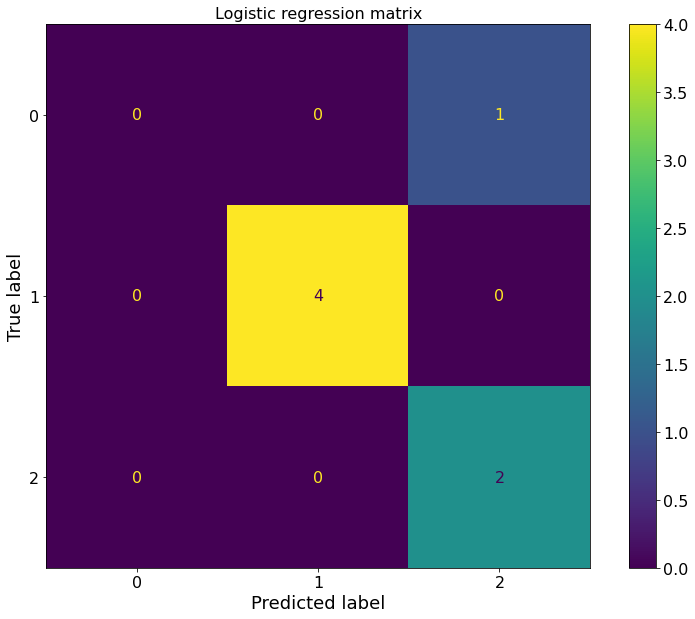

In [268]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(14, 10))
# Create the matrix
plt.rcParams.update({'font.size': 16})
cm = confusion_matrix(y_test, preds)
cmp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
ax.set_title('Logistic regression matrix',fontsize=16)
ax.set_xlabel('Predicted Label',fontsize=18)
ax.set_ylabel('True Label',fontsize=18)
#ax.tick_params(axis='both', which='major', labelsize=15) 
cmp.plot(ax=ax)

plt.show();

## Trying XGboost classifier

In [520]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

xgb_cl.fit(X_train_val , y_train_val)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:51:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [521]:
preds_a = xgb_cl.predict_proba(X_test)

preds_a

array([[0.01553655, 0.49657977, 0.48788366],
       [0.00540548, 0.58630556, 0.40828893],
       [0.00326156, 0.9912116 , 0.00552689],
       [0.00259448, 0.01431632, 0.9830892 ],
       [0.02588899, 0.7256129 , 0.24849813],
       [0.01087296, 0.04899989, 0.94012713],
       [0.00193402, 0.00394121, 0.9941248 ]], dtype=float32)

In [522]:
preds2 = xgb_cl.predict(X_test)
metrics.accuracy_score(y_test,preds2)

0.8571428571428571

In [523]:
print(classification_report(y_test, preds2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         4
           2       0.67      1.00      0.80         2

    accuracy                           0.86         7
   macro avg       0.56      0.67      0.60         7
weighted avg       0.76      0.86      0.80         7



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

## Mapping team names to values

In [396]:

def assign_values_to_team1(team):
    
    if team in df_2.index :
        team1_data =  df_2.loc[team].reset_index()
        team1_data = team1_data.groupby('index').mean().reset_index().rename(columns={'index':'home_team.name'}).iloc[0]
        return team1_data

#     else:
#         return(pd.concat([pd.Series(data = [team], index=['home_team.name']),average_home]))
    
def assign_values_to_team2(team):
    
    if team in df_3.index :
        team2_data =  df_3.loc[team].reset_index()
        team2_data = team2_data.groupby('index').mean().reset_index().rename(columns={'index':'away_team.name'}).iloc[0]
        return team2_data

#     else:
#         return(pd.concat([pd.Series(data = [team], index=['away_team.name']),average_away]))
        
    
def map_inputs_to_data(team1,team2):
    team_1 = assign_values_to_team1(team1)
    team_2 = assign_values_to_team2(team2)

    input_data = pd.concat([team_1,team_2])
    return input_data

In [479]:
len(df_team_away.reset_index().groupby('index').mean().index)

52

## Try with different inputs

### Teams played in world cup 2018

In [401]:
pd.DataFrame(input_d).T

,home_team.name,home_team_Shots on Goal,home_team_Shots off Goal,home_team_Total Shots,home_team_Blocked Shots,home_team_Shots insidebox,home_team_Shots outsidebox,home_team_Fouls,home_team_Corner Kicks,home_team_Offsides,home_team_Ball Possession,home_team_Yellow Cards,home_team_Red Cards,home_team_Goalkeeper Saves,home_team_Total passes,home_team_Passes accurate,home_team_Passes %,home_team.Rank,home_team_Avg. age,home_team.Total value,home_team.Points,home_Pl,home_Age,home_Poss,home_MP,home_Starts,home_Min,home_90s,home_Gls,home_Ast,home_G-PK,home_PK,home_PKatt,home_CrdY,home_CrdR,home_Gls.1,home_Ast.1,home_G+A,home_G-PK.1,home_G+A-PK,away_team.name,away_team_Shots on Goal,away_team_Shots off Goal,away_team_Total Shots,away_team_Blocked Shots,away_team_Shots insidebox,away_team_Shots outsidebox,away_team_Fouls,away_team_Corner Kicks,away_team_Offsides,away_team_Ball Possession,away_team_Yellow Cards,away_team_Red Cards,away_team_Goalkeeper Saves,away_team_Total passes,away_team_Passes accurate,away_team_Passes %,away_team.Rank,away_team. age,away_team.Total value,away_team.Points,away_Pl,away_Age,away_Poss,away_MP,away_Starts,away_Min,away_90s,away_Gls,away_Ast,away_G-PK,away_PK,away_PKatt,away_CrdY,away_CrdR,away_Gls.1,away_Ast.1,away_G+A,away_G-PK.1,away_G+A-PK
0,Egypt,1.666667,5.333333,9.333333,2.333333,4.666667,4.666667,12.666667,2.0,1.333333,42.666667,1.666667,0.0,3.666667,409.666667,316.333333,77.333333,34.0,27.6,152900000.0,1497.0,16.0,28.9,43.3,3.0,33.0,270.0,3.0,2.0,1.0,1.0,1.0,1.0,5.0,0.0,0.67,0.33,1.0,0.33,0.67,Libya,3.942623,5.47541,12.565574,3.147541,7.286885,5.352459,13.401639,4.655738,1.385246,50.0,1.737705,0.032787,2.647541,464.45082,380.827869,80.221311,19.508197,27.109016,396871639.344262,1618.139344,19.121585,27.579372,49.37418,4.172131,45.893443,386.47541,4.291667,5.301913,3.015027,4.73224,0.569672,0.72541,4.11612,0.185792,1.117158,0.630314,1.747568,0.990751,1.621243


In [411]:
input_d = map_inputs_to_data('Egypt' , 'England')
input_processed = preprocess_pipeline.transform(pd.DataFrame(input_d).T)

In [416]:
preds_test = model.predict_proba(input_processed)

In [417]:
np.round(preds_test,2)

array([[0.06, 0.13, 0.81]])

In [421]:
classes = model.classes_

In [504]:
classes

array([0, 1, 2])

In [498]:
def predict_match_result(team1 ,team2):
    
    input_d = map_inputs_to_data(team1 , team2)
    input_processed = preprocess_pipeline.transform(pd.DataFrame(input_d).T)
    preds_test = model.predict_proba(input_processed)
    
    results_df = pd.DataFrame(columns=classes,data=np.round(preds_test,2))
    results_df.rename(columns={0:'Draw Probability',1:'{} wins Probability'.format(team1),2:'{} wins Probability'.format(team2)},inplace=True)
    return(results_df)
    
                     

In [508]:
df_3

,away_team_Shots on Goal,away_team_Shots off Goal,away_team_Total Shots,away_team_Blocked Shots,away_team_Shots insidebox,away_team_Shots outsidebox,away_team_Fouls,away_team_Corner Kicks,away_team_Offsides,away_team_Ball Possession,away_team_Yellow Cards,away_team_Red Cards,away_team_Goalkeeper Saves,away_team_Total passes,away_team_Passes accurate,away_team_Passes %,away_team.Rank,away_team. age,away_team.Total value,away_team.Points,away_Pl,away_Age,away_Poss,away_MP,away_Starts,away_Min,away_90s,away_Gls,away_Ast,away_G-PK,away_PK,away_PKatt,away_CrdY,away_CrdR,away_Gls.1,away_Ast.1,away_G+A,away_G-PK.1,away_G+A-PK
France,4,4,9,1,6,3,21,0,0,39,3,0,1,344,280,81,3,26.9,9.490000e+08,1786,19.666667,26.400000,50.80,5.000000,55.000000,450.0,5.000000,7.000000,4.000000,5.666667,1.333333,1.666667,3.000000,0.333333,1.213333,0.686667,1.900000,1.006667,1.690000
Nigeria,3,5,9,1,4,5,20,3,0,33,2,0,2,283,186,66,32,26.3,2.687500e+08,1510,17.666667,25.666667,49.05,3.333333,36.666667,300.0,3.333333,3.000000,1.666667,2.333333,0.666667,0.666667,4.000000,0.000000,0.916667,0.473333,1.390000,0.696667,1.166667
France,5,8,19,6,12,7,6,4,1,36,2,0,3,345,289,84,3,26.9,9.490000e+08,1786,19.666667,26.400000,50.80,5.000000,55.000000,450.0,5.000000,7.000000,4.000000,5.666667,1.333333,1.666667,3.000000,0.333333,1.213333,0.686667,1.900000,1.006667,1.690000
Brazil,9,7,27,11,16,11,14,8,1,58,2,0,2,521,463,89,2,27.7,8.995000e+08,1823,19.333333,28.233333,56.00,5.666667,62.333333,520.0,5.766667,9.333333,5.333333,9.000000,0.333333,0.333333,3.000000,0.333333,1.633333,0.876667,2.510000,1.586667,2.463333
England,2,6,11,3,6,5,11,7,3,46,0,0,2,467,410,88,5,25.2,1.260000e+09,1756,20.333333,27.033333,54.35,4.666667,51.333333,440.0,4.900000,5.666667,2.666667,4.666667,1.000000,1.000000,3.333333,0.000000,0.996667,0.483333,1.476667,0.863333,1.346667
France,6,0,7,1,2,5,13,2,1,34,2,0,2,289,198,69,3,26.9,9.490000e+08,1786,19.666667,26.400000,50.80,5.000000,55.000000,450.0,5.000000,7.000000,4.000000,5.666667,1.333333,1.666667,3.000000,0.333333,1.213333,0.686667,1.900000,1.006667,1.690000
Russia,5,7,13,1,10,3,25,6,1,35,1,0,1,400,259,65,35,26.9,1.213000e+08,1493,17.500000,28.450000,43.45,4.000000,44.000000,390.0,4.350000,6.000000,5.000000,5.500000,0.500000,0.500000,4.000000,0.500000,1.215000,1.040000,2.255000,1.130000,2.165000
Argentina,3,3,10,4,8,2,16,5,3,57,3,0,2,499,397,80,4,26.2,5.817000e+08,1767,20.000000,27.800000,59.85,5.333333,58.666667,510.0,5.666667,7.333333,3.000000,7.333333,0.000000,0.333333,4.000000,0.000000,1.390000,0.623333,2.016667,1.390000,2.016667
Iceland,6,8,16,2,12,4,10,10,1,38,3,0,0,314,226,72,60,24.7,7.350000e+06,1383,18.000000,30.000000,33.00,3.000000,33.000000,270.0,3.000000,2.000000,0.000000,1.000000,1.000000,2.000000,3.000000,0.000000,0.670000,0.000000,0.670000,0.330000,0.330000
France,5,5,12,2,7,6,16,5,0,55,1,0,1,508,426,84,3,26.9,9.490000e+08,1786,19.666667,26.400000,50.80,5.000000,55.000000,450.0,5.000000,7.000000,4.000000,5.666667,1.333333,1.666667,3.000000,0.333333,1.213333,0.686667,1.900000,1.006667,1.690000


In [466]:
# pickling the model
import pickle
pickle_out = open("model.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [485]:
pickle_out2 = open("pipeline.pkl", "wb")
pickle.dump(preprocess_pipeline, pickle_out2)
pickle_out2.close()

### New Teams

In [455]:
# def predict_new_team_match_result(team1 ,team2):
    
    
    
#     input_d = map_inputs_to_data(team1 , team2)
#     df_temp = df_all.append(input_d, ignore_index=True)
#     X = df_temp.drop('match_result',axis=1)
#     y = df_temp['match_result']
    
#     X = preprocess_pipeline.fit_transform(X)
#     preds_test =model.predict_proba(X[-1].reshape(1, -1))
#     results_df = pd.DataFrame(columns=classes,data=np.round(preds_test,2))
#     results_df.rename(columns={0:'Draw Probability',1:'{} wins Probability'.format(team1),2:'{} wins Probability'.format(team2)},inplace=True)
#     display(results_df)

# predict_new_team_match_result('Libya' , 'England')